In [636]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Train_Df
train_df = pd.read_csv("Data for Cleaning & Modeling.csv", index_col=0, )
test_df = pd.read_csv("Holdout for Testing.csv",index_col=0)

C:\Users\vidis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [637]:
train_df.head()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
X1,,,,,,,,,,,,,,,,,,,,,
11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,< 1 year,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,< 1 year,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,1 year,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,10+ years,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,6 years,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [638]:
test_df.head()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
X1,,,,,,,,,,,,,,,,,,,,,
NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,10+ years,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,8 years,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,10+ years,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,10+ years,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,10+ years,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [639]:
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

In [640]:
#Drop the predictor column from test
test_df = test_df.drop(['X1'],axis = 1)

In [641]:
#Preprocessing
train_df['X1'] = pd.to_numeric(train_df['X1'].str.replace('%', ''))/100
train_df['X4'] = train_df.X4.replace('[\$,)]','',regex=True).astype(float)
train_df['X5'] = train_df.X5.replace('[\$,)]','',regex=True).astype(float)
train_df['X6'] = train_df.X6.replace('[\$,)]','',regex=True).astype(float)
train_df['X30'] = train_df.X30.replace('%','',regex=True).astype(float)/100
test_df['X4'] = test_df.X4.replace('[\$,)]','',regex=True).astype(float)
test_df['X5'] = test_df.X5.replace('[\$,)]','',regex=True).astype(float)
test_df['X6'] = test_df.X6.replace('[\$,)]','',regex=True).astype(float)
test_df['X30'] = test_df.X30.replace('%','',regex=True).astype(float)/100

In [642]:
#Checking for missing values:
#Checking for any null values (% of missing values)
missing_values=train_df.isnull().sum().sort_values(ascending=False)*100/len(train_df)
missing_values = pd.DataFrame(missing_values,columns = ['Missing_Percent'])
missing_values_test=test_df.isnull().sum().sort_values(ascending=False)*100/len(test_df)
missing_values_test = pd.DataFrame(missing_values_test,columns = ['Missing_Percent'])

In [643]:
missing_values.head(10)

,Missing_Percent
X26,87.21125
X16,69.11000
X25,54.70050
X12,15.34025
X8,15.31750
X9,15.31750
X13,15.25700
X1,15.25250
X10,5.99650
X11,4.38450


In [644]:
missing_values_test.head(10)

,Missing_Percent
X16,99.98125
X26,82.70125
X25,48.38000
X10,5.49250
X11,5.47750
X30,0.03750
X21,0.00000
X22,0.00000
X23,0.00000
X24,0.00000


In [645]:
# instead of imputing the predictor variable , we drop the rows with missing interest rate values
train_df = train_df.dropna(subset=['X1'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X2      338989 non-null  float64
 2   X3      338989 non-null  float64
 3   X4      338989 non-null  float64
 4   X5      338989 non-null  float64
 5   X6      338989 non-null  float64
 6   X7      338989 non-null  object 
 7   X8      287123 non-null  object 
 8   X9      287123 non-null  object 
 9   X10     318733 non-null  object 
 10  X11     324195 non-null  object 
 11  X12     287030 non-null  object 
 12  X13     287238 non-null  float64
 13  X14     338989 non-null  object 
 14  X15     338989 non-null  object 
 15  X16     105056 non-null  object 
 16  X17     338989 non-null  object 
 17  X18     338973 non-null  object 
 18  X19     338989 non-null  object 
 19  X20     338989 non-null  object 
 20  X21     338989 non-null  float64
 21  X22     33

Text(0, 0.5, 'The number of features')

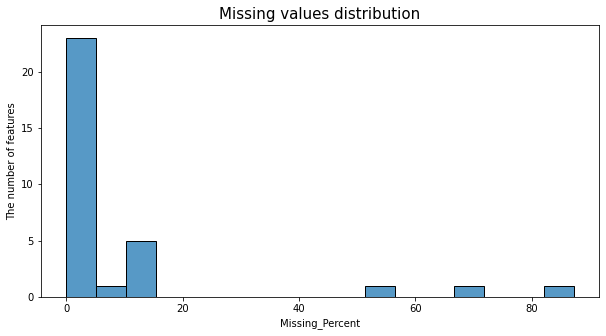

In [366]:
plt.figure(figsize=(10,5))
sns.histplot(x=missing_values.Missing_Percent).set_title('Missing values distribution',size=15)
plt.ylabel('The number of features')

In [438]:
#Drop columns with > 80% missing values
Drop_missingvalues = missing_values[(missing_values.Missing_Percent>80)].index.to_list()
Drop_missingvalues_test = missing_values_test[(missing_values_test.Missing_Percent>80)].index.to_list()

In [399]:
train_df=train_df.drop(['X16','X26'],axis=1)
test_df=test_df.drop(['X16','X26'],axis=1)

In [415]:
train_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,0.1189,54734.0,80364.0,25000.0,25000.0,19080.0,36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,0.521,42.0,f
1,0.1071,55742.0,114426.0,7000.0,7000.0,673.0,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,0.767,7.0,f
2,0.1699,57167.0,137225.0,25000.0,25000.0,24725.0,36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,0.663,17.0,f
3,0.1311,57245.0,138150.0,1200.0,1200.0,1200.0,36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,0.404,31.0,f
4,0.1357,57416.0,139635.0,10800.0,10800.0,10692.0,36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,0.256,40.0,f


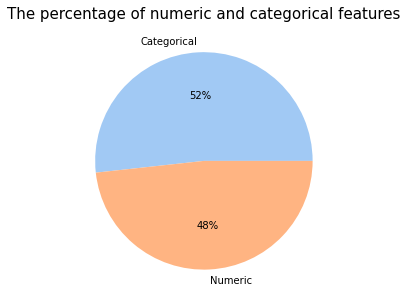

In [223]:
#Pichart
data = [len(Categorical_Features),len(Numeric_Features)]
colors = sns.color_palette('pastel')
plt.figure(figsize=(10,5))
plt.title('The percentage of numeric and categorical features',size=15)
plt.pie(data, colors = colors, labels=['Categorical','Numeric'] ,autopct = '%0.0f%%')
plt.show()

In [646]:
# X11 & X7 - remove the strings from work year
train_df['X11'] = train_df.X11.replace('\D+','',regex=True).astype(float)
test_df['X11'] = test_df.X11.replace('\D+','',regex=True).astype(float)
train_df['X7'] = train_df.X7.replace('\D+','',regex=True).astype(float)
test_df['X7'] = test_df.X7.replace('\D+','',regex=True).astype(float)
#X19 remove "XX" from X19 to extract the zipcode
train_df['X19'] = train_df.X19.replace('\D+','',regex=True).astype(float)
test_df['X19'] = test_df.X19.replace('\D+','',regex=True).astype(float)

In [648]:
#Grouping the income column 
train_df["X13"].fillna(train_df.groupby("X9")["X13"].transform("mean"), inplace=True)
test_df["X13"].fillna(test_df.groupby("X9")["X13"].transform("mean"), inplace=True)

In [649]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X2      338989 non-null  float64
 2   X3      338989 non-null  float64
 3   X4      338989 non-null  float64
 4   X5      338989 non-null  float64
 5   X6      338989 non-null  float64
 6   X7      338989 non-null  float64
 7   X8      287123 non-null  object 
 8   X9      287123 non-null  object 
 9   X10     318733 non-null  object 
 10  X11     324195 non-null  float64
 11  X12     287030 non-null  object 
 12  X13     331228 non-null  float64
 13  X14     338989 non-null  object 
 14  X15     338989 non-null  object 
 15  X16     105056 non-null  object 
 16  X17     338989 non-null  object 
 17  X18     338973 non-null  object 
 18  X19     338989 non-null  float64
 19  X20     338989 non-null  object 
 20  X21     338989 non-null  float64
 21  X22     33

In [650]:
#Datatypes
df= train_df.dtypes.value_counts()
numerical = train_df.select_dtypes(exclude=['object'])
categorical = train_df.select_dtypes(include=['object'])
numerical_test = test_df.select_dtypes(exclude=['object'])
categorical_test = test_df.select_dtypes(include=['object'])

In [651]:
#Handling missing values, replace with median for numerical and mode for categorical
from statistics import mode
for col in numerical:
    train_df[col].fillna(train_df[col].median(),inplace=True)
for col in numerical_test:
    test_df[col].fillna(test_df[col].median(),inplace=True)  


for col in categorical_datatype:
    train_df[col].fillna(train_df[col].mode(col),inplace=True)
for col in categorical_test:
    test_df[col].fillna(test_df[col].mode(col),inplace=True) 

In [652]:
train_df.isnull().sum()

X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8      51867
X9      51867
X10     20256
X11         0
X12     51960
X13         0
X14         1
X15         1
X16    233934
X17         1
X18        17
X19         0
X20         1
X21         0
X22         0
X23         1
X24         0
X25         0
X26         0
X27         0
X28         0
X29         0
X30         0
X31         0
X32         1
dtype: int64

In [653]:
#We drop the unnecessary columns from the data
train_df = train_df.drop(['X10','X15','X23','X16','X2','X3','X18'], axis=1)
test_df  = test_df.drop(['X10','X15','X23','X3','X16','X18','X2'], axis=1)

In [654]:
train_df.isnull().sum()

X1         0
X4         0
X5         0
X6         0
X7         0
X8     51867
X9     51867
X11        0
X12    51960
X13        0
X14        1
X17        1
X19        0
X20        1
X21        0
X22        0
X24        0
X25        0
X26        0
X27        0
X28        0
X29        0
X30        0
X31        0
X32        1
dtype: int64

In [655]:
#Replace the nulls as others
train_df = train_df.replace(np.nan, 'other', regex=True)
test_df = test_df.replace(np.nan, 'other', regex=True)

In [656]:
train_df.isnull().sum()

X1     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X11    0
X12    0
X13    0
X14    0
X17    0
X19    0
X20    0
X21    0
X22    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
dtype: int64

In [657]:
train_df.corr()

,X1,X4,X5,X6,X7,X11,X13,X19,X21,X22,X24,X25,X26,X27,X28,X29,X30,X31
X1,1.000000,0.177733,0.178727,0.181031,0.456448,0.038940,-0.033920,-0.005745,0.158110,0.091662,0.210400,-0.022159,-0.019799,0.020456,0.073578,0.008172,0.342493,-0.027146
X4,0.177733,1.000000,0.998331,0.994394,0.411106,0.120513,0.329502,-0.008378,0.061124,0.008768,-0.002119,-0.028018,0.015331,0.204428,-0.077598,0.334003,0.118177,0.237175
X5,0.178727,0.998331,1.000000,0.996400,0.408792,0.121073,0.328898,-0.008288,0.062649,0.009370,-0.002318,-0.028008,0.015157,0.205324,-0.077016,0.333582,0.119481,0.237043
X6,0.181031,0.994394,0.996400,1.000000,0.409530,0.123664,0.327290,-0.007959,0.066550,0.010229,-0.003903,-0.025778,0.027213,0.206373,-0.075429,0.332030,0.121763,0.237448
X7,0.456448,0.411106,0.408792,0.409530,1.000000,0.082660,0.062177,-0.033312,0.087499,0.005597,0.025957,-0.008314,0.016303,0.073094,-0.019520,0.093304,0.084547,0.099042
X11,0.038940,0.120513,0.121073,0.123664,0.082660,1.000000,0.065443,-0.007608,0.050364,0.031344,-0.005837,-0.002974,0.017641,0.043690,0.038081,0.093582,0.047076,0.115603
X13,-0.033920,0.329502,0.328898,0.327290,0.062177,0.065443,1.000000,-0.008890,-0.168611,0.055188,0.058608,-0.033939,-0.028689,0.142848,-0.014871,0.301014,0.028485,0.205164
X19,-0.005745,-0.008378,-0.008288,-0.007959,-0.033312,-0.007608,-0.008890,1.000000,0.008225,-0.017608,-0.003852,0.013725,0.021564,-0.051668,-0.005042,-0.020590,0.026075,-0.026060
X21,0.158110,0.061124,0.062649,0.066550,0.087499,0.050364,-0.168611,0.008225,1.000000,-0.002779,0.000108,0.003208,0.036093,0.304079,-0.045657,0.146286,0.206162,0.228753
X22,0.091662,0.008768,0.009370,0.010229,0.005597,0.031344,0.055188,-0.017608,-0.002779,1.000000,0.024450,-0.481591,-0.024654,0.062197,-0.008412,-0.030157,-0.011832,0.133374


<AxesSubplot:>

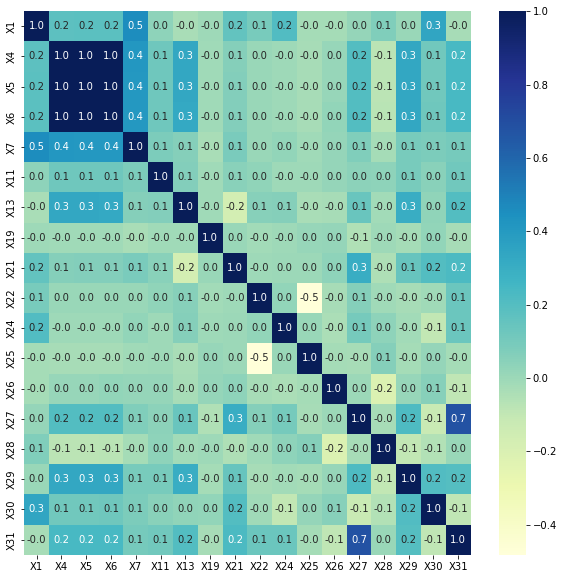

In [658]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True, cbar=True, cmap='YlGnBu', fmt='.1f')

In [ ]:
#Impute the income column using KNN imputer since it is a important column , we find clusters and allocate each cluster mean to the missing fields
# define imputer
#imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
#After_imputation = imputer.fit_transform(train_df)

In [659]:
from sklearn.preprocessing import LabelEncoder

In [660]:
#Datatypes
df= train_df.dtypes.value_counts()
numerical = train_df.select_dtypes(exclude=['object'])
categorical = train_df.select_dtypes(include=['object'])
numerical_test = test_df.select_dtypes(exclude=['object'])
categorical_test = test_df.select_dtypes(include=['object'])

In [661]:
label_encoder = LabelEncoder()
for col in categorical:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.fit_transform(test_df[col])

In [662]:
categorical.head()

,X8,X9,X12,X14,X17,X20,X32
0,B,B4,RENT,VERIFIED - income,debt_consolidation,CA,f
1,B,B5,RENT,not verified,credit_card,NY,f
2,D,D3,RENT,VERIFIED - income,debt_consolidation,NY,f
3,C,C2,OWN,not verified,debt_consolidation,TX,f
4,C,C3,RENT,not verified,debt_consolidation,CT,f


In [663]:
numerical.head()

,X1,X4,X5,X6,X7,X11,X13,X19,X21,X22,X24,X25,X26,X27,X28,X29,X30,X31
0,0.1189,25000.0,25000.0,19080.0,36.0,1.0,85000.0,941.0,19.48,0.0,0.0,31.0,80.0,10.0,0.0,28854.0,0.521,42.0
1,0.1071,7000.0,7000.0,673.0,36.0,1.0,65000.0,112.0,14.29,0.0,0.0,31.0,80.0,7.0,0.0,33623.0,0.767,7.0
2,0.1699,25000.0,25000.0,24725.0,36.0,1.0,70000.0,100.0,10.50,0.0,0.0,41.0,80.0,10.0,0.0,19878.0,0.663,17.0
3,0.1311,1200.0,1200.0,1200.0,36.0,10.0,54000.0,777.0,5.47,0.0,0.0,64.0,80.0,5.0,0.0,2584.0,0.404,31.0
4,0.1357,10800.0,10800.0,10692.0,36.0,6.0,32000.0,67.0,11.63,0.0,1.0,58.0,80.0,14.0,0.0,3511.0,0.256,40.0


In [664]:
categorical_datatype_list = [e for e in categorical
                        .columns]

categorical_datatype_list

['X8', 'X9', 'X12', 'X14', 'X17', 'X20', 'X32']

In [665]:
numerical_datatype_list = [e for e in numerical_test
                        .columns]
numerical_datatype_list

['X4',
 'X5',
 'X6',
 'X7',
 'X11',
 'X13',
 'X19',
 'X21',
 'X22',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31']

In [666]:
# Normalizing the data using minmax scaler
# combine all the features into a single list
from sklearn.preprocessing import MinMaxScaler
features = [*numerical_test, *categorical_test]
scaler = MinMaxScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.fit_transform(test_df[features])


In [679]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X4      338990 non-null  float64
 2   X5      338990 non-null  float64
 3   X6      338990 non-null  float64
 4   X7      338990 non-null  float64
 5   X8      338990 non-null  float64
 6   X9      338990 non-null  float64
 7   X11     338990 non-null  float64
 8   X12     338990 non-null  float64
 9   X13     338990 non-null  float64
 10  X14     338990 non-null  float64
 11  X17     338990 non-null  float64
 12  X19     338990 non-null  float64
 13  X20     338990 non-null  float64
 14  X21     338990 non-null  float64
 15  X22     338990 non-null  float64
 16  X24     338990 non-null  float64
 17  X25     338990 non-null  float64
 18  X26     338990 non-null  float64
 19  X27     338990 non-null  float64
 20  X28     338990 non-null  float64
 21  X29     33

In [668]:
test_df.head()

,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,...,X22,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,0.147059,0.147059,0.147686,0.0,0.333333,0.411765,1.000000,0.0,0.007294,0.0,...,0.0,0.125,0.147727,0.554622,0.217949,0.000000,0.019026,0.349404,0.183544,0.0
1,0.676471,0.676471,0.676708,0.0,0.000000,0.000000,0.777778,1.0,0.012176,0.0,...,0.0,0.125,0.170455,0.554622,0.141026,0.000000,0.016287,0.141928,0.202532,1.0
2,1.000000,1.000000,1.000000,0.0,0.333333,0.323529,1.000000,0.0,0.009363,0.0,...,0.0,0.000,0.170455,0.554622,0.192308,0.000000,0.024713,0.270314,0.183544,1.0
3,0.264706,0.264706,0.265246,1.0,0.500000,0.441176,1.000000,1.0,0.002928,0.5,...,0.0,0.125,0.170455,0.949580,0.153846,0.045455,0.009183,0.237270,0.107595,1.0
4,0.676471,0.676471,0.676708,1.0,0.166667,0.147059,1.000000,0.0,0.008961,0.0,...,0.0,0.000,0.272727,0.554622,0.333333,0.000000,0.030504,0.223727,0.246835,1.0


In [669]:
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
from xgboost import XGBClassifier
%matplotlib inline

In [627]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [630]:
#Random forest
X_train = train_df.drop("X1",axis=1)
Y_train = train_df["X1"]

estimator=RandomForestRegressor(n_jobs=+1, random_state=0, max_features="auto",max_depth=2)
estimator.fit(X_train,Y_train)
score=cross_val_score(estimator,X_train,Y_train,cv=10).mean()
print (score)

prediction = estimator.predict(test_df)
print (prediction)

0.5821768654866306
[0.17103361 0.0809366  0.17103361 ... 0.17103361 0.17103361 0.11984165]


In [ ]:
### Interpretation ###
Random forest or random decision forests are an ensemble learning method used for classification, regression and other tasks that operates by constructing a multitude of decision 
trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.


In [631]:
from sklearn.linear_model import LinearRegression
X_train = train_df.drop("X1",axis=1)
Y_train = train_df["X1"]
clf = LinearRegression()
clf.fit(X_train, Y_train) 
y_pred_linear_reg = clf.predict(test_df)

In [632]:
y_pred_linear_reg 

array([0.27430828, 0.14344078, 0.225001  , ..., 0.18287274, 0.2514551 ,
       0.30952225])

In [670]:

sample = pd.read_csv("submission.csv")
sample.head()

,X1


In [674]:
sample['X1'] = np.round(prediction, 4)

In [675]:
sample.to_csv("submission.csv", index=False)
pd.read_csv("submission.csv").head()

,X1
0,0.1710
1,0.0809
2,0.1710
3,0.1710
4,0.0809
